# Lab One - Climatic Averages 

## *Analyzing the Global Temperatures Divergence from Average from 1880 - 2017*

In this lab we learn part 1 basics of Python (the programming commands) for data analysis through utilizing the Jupyter environment (this display) to analyze data. 

You will learn how to: 


- Use Jupyter
- Read in a CSV (comma seperated data file) into a data format for analysis
- Implement Simple Flow Structures (for loops, if statements)
- Plotting Basics (line plots, bar charts, and colors)
- Indexing (simple, and boolean indexing)
- Use the following data structures: numpy arrays (1D) and Pandas dataframes (2D)
- Use Hex Codes for Colors

By the end of this lab you should be able to: read in simple data from CSV, use boolean indexing, and make a line plot / bar chart

Additional materials for reading: Igual & Seguí Chapter 1 Chapter 2: Sections 2.1 through 2.6.2 

More on Jupyter here:
    http://jupyter-notebook.readthedocs.io/en/stable/notebook.html

### What is Jupyter?

Jupyter is a interactive environment (this "notebook") where we can explore how a programming language ie Python works. You can "run" various cells at a time by hitting shift-enter OR by hitting run after selecting a cell. 

To edit a cell: double click. 
To make a text box cell: use the Cell -> Markdown option

I like to think of this as a display format which is mixed text like this box and code in the next box - we will be doing the first lab reports using Jupyter. 

### What is Python and why are we using it?

Python is a object oriented programming language. This means it has 'objects' which have certain rules or methods which you can access to run programming. We will see this in action in the following lab. 

### Let's start by importing some packages

In [1]:
#think of packages like enabling different levels of a game 
#the hashtag we use to make a comment, this line can be used so that the computer skips 
#reading this code

import numpy as np
import pandas as pd

#these two packages enable data analysis through various objects (and their methods) and 
#data types. 

#for example, you can create a numpy array - 1D data array - of numbers as follows

#this creates an arrange from 0 to 9 every second value
ExampleArray = np.arange(0, 10, 2)

#you can see this as follows with the following print command

#NOTE IT SKIPS THE LAST NUMBER of 10, keep this in mind for later
print(ExampleArray)

[0 2 4 6 8]


In [2]:
#each object in python has a type, in this case we see that it is a numpy array.

type(ExampleArray)

numpy.ndarray

In [3]:
#We can access different values within an array with indexing, for example:

print(ExampleArray[0]) #print index 0 value
print(ExampleArray[1]) #print index 1 value

0
2


In [4]:
#types also include, integers (non-decimal numbers), floats (decmial numbers), strings (words)

#for example
print(type(ExampleArray[0]))
ExampleInt = 5
print(type(ExampleInt))

#if you get a type error when you run code, use these type commands to see what is the 
#issue, most likely you are trying to do something that can not be done to a string, 
#or an integer etc. 

#Note the type of this number is an numpy int65
#as compared to the type of of Example Int which is JUST int - less accuracy

<type 'numpy.int64'>
<type 'int'>


### Now what about that other package we imported? Pandas?

Pandas is a package which we use to enable data set analysis. There are other data structures within Python that we 
can use as well, for example numpy arrays, dictionaries, and lists. We will focus right now on pandas dataframes.

### What is a Pandas dataframe?

A pandas dataframe is a 2D data structure which includes an index and rows and columns of data. These can include ints, floats, strings, etc. 

A good way to think of a pandas dataframe is an excel spreadsheet which we analyze and interpret with Python. 

Enough about all this, let's get our hands on some data. 


In [5]:
#within the folder you all downloaded is a data subdirectory with global temperature 
#anomaly data from following comma seperated values (CSV)

#this data is from the following website: 
#https://www.ncdc.noaa.gov/cag/time-series/global/globe/land/ytd/12/1880-2017

#Provided by NOAA National Center for Environmental Information

#Global temperature anomaly data come from the Global Historical Climatology 
#Network-Monthly (GHCN-M) data set and International Comprehensive Ocean-Atmosphere 
#Data Set (ICOADS), which have data from 1880 to the present. 

#This data is the timeseries of global-scale temperature anomalies calculated with respect to 
#the 20th century average.

#the following command reads from a csv format into a pandas dataframe called temperVarGlobal

#note the header = 4 command, this designates four skipped lines before assigned variables. 

temperVarGlobal = pd.read_csv('./Data/GlobalLandAndOcean_1880-2017_TempVariants.csv', 
                              header = 4)

In [6]:
#let see if this was read in correctely - 

#check the type - should be a dataframe
print(type(temperVarGlobal))

#check the first 10 rows
temperVarGlobal.head(n=10)

#here you can see on the left hand side the index values, followed by the year, then Value. 
#This data did NOT provide a nice column name for the rows in the CSV file so we have the 
#'Value'.

#given the information above and at the website we know that this is the temperature anomoly 
#for Earth for each year in Celcius

<class 'pandas.core.frame.DataFrame'>


,Year,Value
0,1880,-0.13
1,1881,-0.07
2,1882,-0.07
3,1883,-0.15
4,1884,-0.21
5,1885,-0.22
6,1886,-0.21
7,1887,-0.25
8,1888,-0.15
9,1889,-0.10


In [7]:
#you can also check the column values as follows:

print(temperVarGlobal.columns)

Index([u'Year', u'Value'], dtype='object')


In [8]:
#let's rename the column so it's not a vague "Value"

temperVarGlobal.rename(columns={'Value': 'AnomalyC'}, inplace=True)
#inplace = True is to prevent redefining a NEW dataframe object


#let's check the columns
print(temperVarGlobal.columns)

Index([u'Year', u'AnomalyC'], dtype='object')


In [9]:
#how about for fun, let's check the 50'th entry?
print(temperVarGlobal.loc[50, 'AnomalyC'])

-0.1


In [10]:
#what about the entire row?
print(temperVarGlobal.loc[50, :])

#Can you guess what : does?

Year        1930.0
AnomalyC      -0.1
Name: 50, dtype: float64


### This is in Celcius, maybe it would make sense to create a column in Farenheit?

Formula is: T(F) = T(C) × 1.8 for a temperature difference we skip  adding 32

In [11]:
#here we define a NEW columns based off the old column
temperVarGlobal['AnomalyF'] = temperVarGlobal['AnomalyC'] * 1.8

#let's make sure this did what we wanted
print(temperVarGlobal.head(n=10))

   Year  AnomalyC  AnomalyF
0  1880     -0.13    -0.234
1  1881     -0.07    -0.126
2  1882     -0.07    -0.126
3  1883     -0.15    -0.270
4  1884     -0.21    -0.378
5  1885     -0.22    -0.396
6  1886     -0.21    -0.378
7  1887     -0.25    -0.450
8  1888     -0.15    -0.270
9  1889     -0.10    -0.180


# Plotting

In [12]:
#step one, we import a plotting package
import matplotlib.pyplot as plt

#and to enable our visualization Jupyter to print our plots IN LINE we use the following
#command
%matplotlib inline

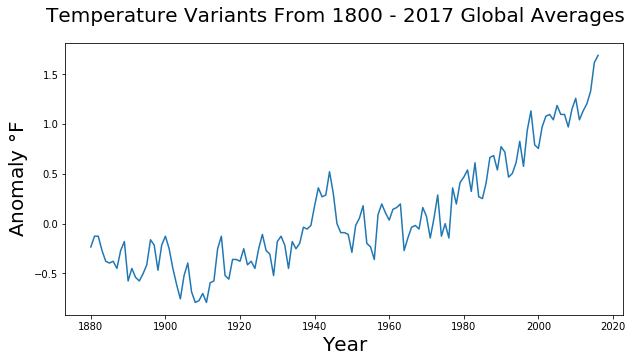

In [13]:
#define a figure (think of this as a page)
fig = plt.figure(figsize=(10, 5))

#let's give it a title
fig.suptitle('Temperature Variants From 1800 - 2017 Global Averages', fontsize=20)

#lets just make a line plot, worry about everything else later
plt.plot(temperVarGlobal['Year'], temperVarGlobal['AnomalyF'])

#and label some axis. 
plt.ylabel('Anomaly $\degree$F', fontsize = 20)
plt.xlabel('Year', fontsize = 20)

#SPECIAL NOTE using $COMMANDS$  in a text entry will enable mathematical symbols through
#Latex - see special enabled commands here: 
#https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols

### So this is sorta...gross looking. 1) the labels are small and hard to read 2) it's also hard to tell if it's below or above zero which is really the main point of this chart...let's add some nifty features

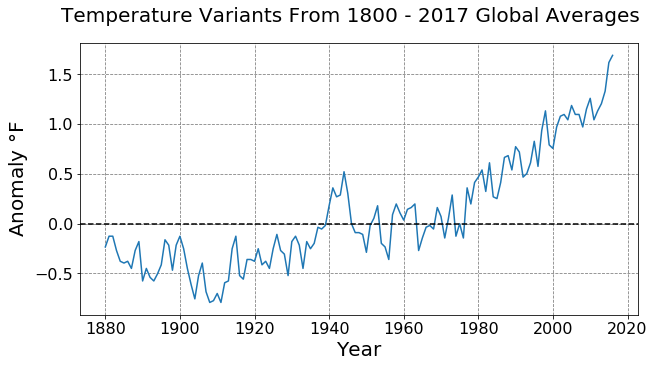

In [14]:
fig = plt.figure(figsize=(10, 5))
fig.suptitle('Temperature Variants From 1800 - 2017 Global Averages', fontsize=20)

plt.plot(temperVarGlobal['Year'], temperVarGlobal['AnomalyF'])

plt.ylabel('Anomaly $\degree$F', fontsize = 20)
plt.xlabel('Year', fontsize = 20)


#----------------------------------------- we add the following to our code
plt.xticks(fontsize=16) #make the xaxis labels larger
plt.yticks(fontsize=16) #make the yaxis labels larger
plt.axhline(y=0.0, color='k', linestyle='--') #add a horizontal line at 0
plt.grid(color='gray', linestyle='dashed') #add a grid so it's easier to tell if at zero
#-----------------------------------------


### Mmmmmm so this is getting better. But what we loose here is that we KNOW that each point has a definitive width of 1 year, it's an average over that year, the chaotic behaivor of the line is more misleading than informative

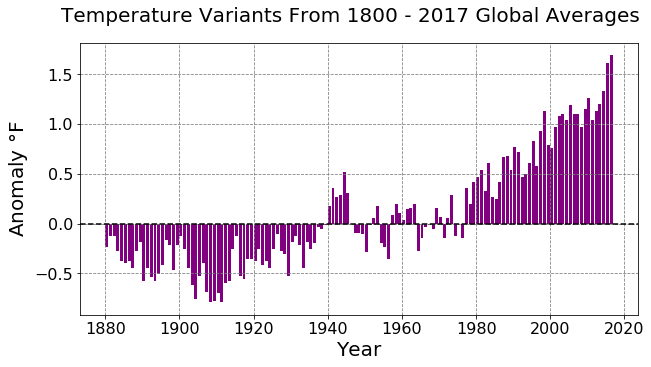

In [15]:
fig = plt.figure(figsize=(10, 5))
fig.suptitle('Temperature Variants From 1800 - 2017 Global Averages', fontsize=20)

#----------------------------------------- we have edited this into a bar chart

#note we make it purple for fun ;)
#also the align = 'edge' will align to the left side of the range
#width = 0.8 rather than 1 simply to make it appear more interesting. Go ahead and play 
#with the width to see why it's at 0.8
plt.bar(temperVarGlobal['Year'], temperVarGlobal['AnomalyF'], width = 0.8, align='edge', 
        color = 'purple')
#----------------------------------------- 
plt.ylabel('Anomaly $\degree$F', fontsize = 20)
plt.xlabel('Year', fontsize = 20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axhline(y=0.0, color='k', linestyle='--')

plt.grid(color='gray', linestyle='dashed')


### So while purple was fun, that's not really the point of this chart. We want to show when it's greater than zero, and less than zero. It would be best if these were actually different colors.

Remember how we set this equal to purple? We can also assign a column JUST for colors in our dataframe so that each bar could have different colors when we plot it. There are two more obvious ways to go about this. In both ways our goal is to create a NEW column in the data frame with the colors of the bars where 

if less than zero we make blue ('b'), greater than we make red ('r').

Way 1)

- The tried and true method of using a for loop to loop over every data value in our array, create a new column, and fill with what color we want it to be. 

Way 2)

- Slightly "pythonic" ie it uses the inbuilt methods of objects (in this case dataframes) to avoid writing extensive loop structures


Let's start with way one. 

## 1 - METHOD ONE  - For Loops. 

In [16]:


#set up new column just for colors, and fill with 'g' for now. We will know if we did 
#something wrong when we plot it because it will be green
temperVarGlobal['Colors'] = 'g'

#now we want to "loop over" our data frame, setting each value in the frame in the column of 
#'Colors' to a set value. 

#what do I mean by a for loop? Here's a simple example, remember our numpy array from earlier? 
for i in ExampleArray:
    
    #print out some text, and what i is
    print("The value of the array is {}.".format(i))

The value of the array is 0.
The value of the array is 2.
The value of the array is 4.
The value of the array is 6.
The value of the array is 8.


In [17]:
#what if we want to count each entry? There's a function called enumerate for numpy arrays
#note it starts at zero

for index, entry in enumerate(ExampleArray):
    #print out some text, and what i is
    print("The value of the array at index {} is {}.".format(index, entry))

The value of the array at index 0 is 0.
The value of the array at index 1 is 2.
The value of the array at index 2 is 4.
The value of the array at index 3 is 6.
The value of the array at index 4 is 8.


In [18]:
#this one is a bit more complicated...but it's the same basic idea where enumerate for 
#numpy arrays is replaced with iterrows() for pandas dataframes, which is exactly what 
#it sounds like, iterate over rows :) 

for index, row in temperVarGlobal.iterrows():
    #iterrates over the entirty of the dataframe
    print("At index {} and year {} the value of AnomalyF is: {}".format(index, row['Year'], 
                                                                        row['AnomalyF']))
    

At index 0 and year 1880 the value of AnomalyF is: -0.234
At index 1 and year 1881 the value of AnomalyF is: -0.126
At index 2 and year 1882 the value of AnomalyF is: -0.126
At index 3 and year 1883 the value of AnomalyF is: -0.27
At index 4 and year 1884 the value of AnomalyF is: -0.378
At index 5 and year 1885 the value of AnomalyF is: -0.396
At index 6 and year 1886 the value of AnomalyF is: -0.378
At index 7 and year 1887 the value of AnomalyF is: -0.45
At index 8 and year 1888 the value of AnomalyF is: -0.27
At index 9 and year 1889 the value of AnomalyF is: -0.18
At index 10 and year 1890 the value of AnomalyF is: -0.576
At index 11 and year 1891 the value of AnomalyF is: -0.45
At index 12 and year 1892 the value of AnomalyF is: -0.54
At index 13 and year 1893 the value of AnomalyF is: -0.576
At index 14 and year 1894 the value of AnomalyF is: -0.504
At index 15 and year 1895 the value of AnomalyF is: -0.414
At index 16 and year 1896 the value of AnomalyF is: -0.162
At index 17 a

In [21]:
#now lets actually assign colors, we can use if statments here another flow control structure

#in words what this loop means: for every entry in our dataframe, see if > 0 or less < 0


for index, row in temperVarGlobal.iterrows():
    
    #check if greater than 0
    if row['AnomalyF'] > 0:
        #set value in array as red
        temperVarGlobal.at[index, 'Colors'] = 'r'
    
    #check if less than 0, or equal to
    if row['AnomalyF'] <= 0:
        #set value in array as blue
        temperVarGlobal.at[index, 'Colors'] = 'b'


In [22]:
#let's check to see what this looks like, print from index 50 - 70
#print both colors and anomalyF columns

print(temperVarGlobal.loc[50:70, ['Colors', 'AnomalyF']])

   Colors  AnomalyF
50      b    -0.180
51      b    -0.126
52      b    -0.216
53      b    -0.450
54      b    -0.180
55      b    -0.252
56      b    -0.198
57      b    -0.036
58      b    -0.054
59      b    -0.018
60      r     0.180
61      r     0.360
62      r     0.270
63      r     0.288
64      r     0.522
65      r     0.306
66      b    -0.000
67      b    -0.090
68      b    -0.090
69      b    -0.108
70      b    -0.288


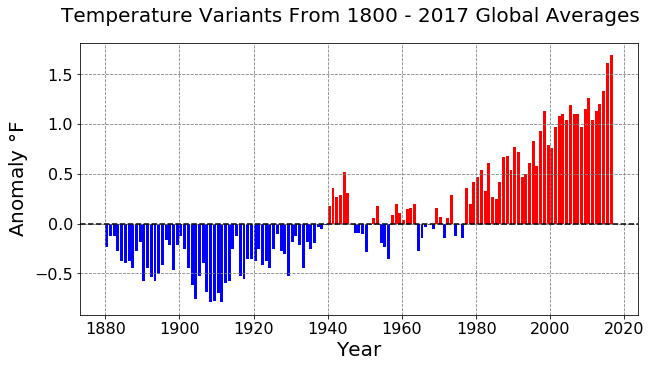

In [23]:
fig = plt.figure(figsize=(10, 5))
fig.suptitle('Temperature Variants From 1800 - 2017 Global Averages', fontsize=20)

#------------------------------------------------  we edited the following color statement ONLY
plt.bar(temperVarGlobal['Year'], temperVarGlobal['AnomalyF'], width = 0.8, align='edge', 
        color = temperVarGlobal['Colors'])
#------------------------------------------------

plt.ylabel('Anomaly $\degree$F', fontsize = 20)
plt.xlabel('Year', fontsize = 20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axhline(y=0.0, color='k', linestyle='--')

plt.grid(color='gray', linestyle='dashed')

## 2 - METHOD TWO  - Boolean Indexing. 

Why? In general python "slows down" with loops. Also it allows for better programming LATER if we use what we
call 'Boolean Indexing'.

We use those logic statements before for greater or lesser and use them to select positions in the dataframe to then subset into our data. For example, all places with >0, all places with <0


In [19]:
#Step One, create boolean arrays, we call these indexes
booleanIndex = temperVarGlobal['AnomalyF'] > 0 

print(temperVarGlobal.loc[0:10, 'AnomalyF'])
print(booleanIndex[0:10])

#let's see what these look like!

0    -0.234
1    -0.126
2    -0.126
3    -0.270
4    -0.378
5    -0.396
6    -0.378
7    -0.450
8    -0.270
9    -0.180
10   -0.576
Name: AnomalyF, dtype: float64
0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: AnomalyF, dtype: bool


In [20]:
#tilda flips the boolean index to the opposite truth value
print(~booleanIndex[0:10])

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: AnomalyF, dtype: bool


In [24]:
#now rather than the for loop we can set up a different system
temperVarGlobal['Colors2'] = 'k'
temperVarGlobal.loc[booleanIndex, 'Colors2'] = '#9F4E58' 
temperVarGlobal.loc[~booleanIndex, 'Colors2'] = '#64ACEA'
#and set the colors up here we use hex code - check out this website. 
#http://www.color-hex.com/color/90537c
print(temperVarGlobal.loc[0:10, ['Colors', 'Colors2']])

   Colors  Colors2
0       b  #64ACEA
1       b  #64ACEA
2       b  #64ACEA
3       b  #64ACEA
4       b  #64ACEA
5       b  #64ACEA
6       b  #64ACEA
7       b  #64ACEA
8       b  #64ACEA
9       b  #64ACEA
10      b  #64ACEA


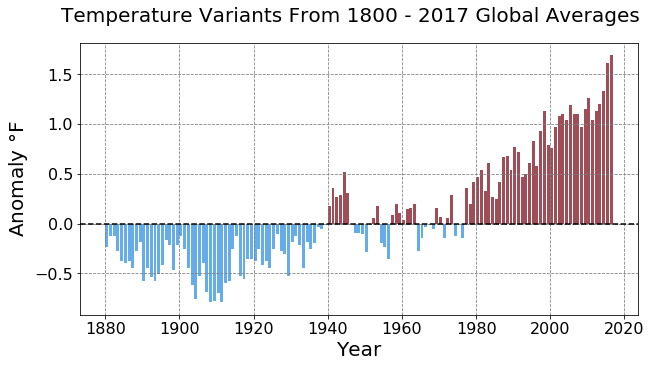

In [25]:
fig = plt.figure(figsize=(10, 5))
fig.suptitle('Temperature Variants From 1800 - 2017 Global Averages', fontsize=20)

#-------- we edited the following color statement ONLY
plt.bar(temperVarGlobal['Year'], temperVarGlobal['AnomalyF'], width = 0.8, align='edge', 
        color = temperVarGlobal['Colors2'])
#----------

plt.ylabel('Anomaly $\degree$F', fontsize = 20)
plt.xlabel('Year', fontsize = 20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axhline(y=0.0, color='k', linestyle='--')

plt.grid(color='gray', linestyle='dashed')

plt.savefig('./Figures/TempVariants_GlobalYearlyAverages.png')

#please go see within your Jupyter folder the .png file

# SUMMARY

From this lab you have learned the basics of python packages including: numpy, pandas, and matplotlib.pyplt. 

We have also learned about flow control structures (for loops, if statements) and how to access a pandas data frame through boolean indexing and through normal indexing and how to manipulate various columns here. 

Next time we will continue our learning of Python.

Homework: Please complete homework 1 located in the file folder - due in 1.5 weeks on Friday the 19th. Office hours for this will be held on Thursday - tommorrow.

This homework should take no more than 4-5 hours but you should start early in case you have any questions or run into issues! 